In [1]:
import matplotlib.pyplot as plt
font = {'size'   : 14}
import matplotlib
matplotlib.rc('font', **font)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Introducción.
. En particular, se busca analizar la relación entre el **rendimiento escolar**, representado por el promedio general de notas de cada estudiante, y factores determinantes como el **porcentaje de asistencia a clases, y la razón entre docentes y estudiantes de los establecimientos educacionales**.

Para este estudio, se utilizarán datos generados y publicados por el  Centro de Estudios del Ministerio de Educación de Chile, https://centroestudios.mineduc.cl/: <br>

*El Centro de Estudios pone a disposición del público en general la plataforma Datos Abiertos para compartir información estadística en materia de educación, que incluye bases de datos de establecimientos educacionales, estudiantes y párvulos, docentes y asistentes de la educación, y sostenedores. Además, se entrega información georreferenciada.*

En este tutorial, nos enfocaremos en el análisis exploratorio de uno de los conjuntos de datos publicados por el MINEDUC, relativo al rendimiento escolar de los estudiantes de Chile en el año 2021.

## Referencias.

Para el análisis exploratorio gráfico, utilizaremos principalmente `seaborn`, una librería de visualización de datos basada en `matplotlib`. Se recomienda revisar la documentoación y galerías de ejemplos disponibles en https://seaborn.pydata.org/index.html.

### 1. Lectura de datos

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/semana5/RendimientoEscolar_EDA.csv') # leer el archivo de datos desde github
df.head(50) # mostrar las primeras 50 filas

,REGION,RURAL,TIPO_ENSE,EDAD_ALU,PROM_GRAL,ASISTENCIA,SITUACION_FINAL
0,9,0,BASICA,8,7.0,100,P
1,13,0,MEDIA_CH,16,6.7,100,P
2,15,0,MEDIA_CH,17,6.5,90,P
3,9,1,BASICA,9,6.4,100,P
4,13,0,BASICA,13,5.6,79,P
5,13,0,MEDIA_TP,17,5.6,85,P
6,9,0,MEDIA_CH,15,5.9,90,P
7,8,0,BASICA,9,6.4,90,P
8,5,0,BASICA,7,6.5,96,P
9,13,0,MEDIA_CH,16,5.6,81,P


In [3]:
df.info() # información del dataframe

# '0'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987653 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REGION           987653 non-null  int64  
 1   RURAL            987653 non-null  int64  
 2   TIPO_ENSE        987653 non-null  object 
 3   EDAD_ALU         987653 non-null  int64  
 4   PROM_GRAL        987653 non-null  float64
 5   ASISTENCIA       987653 non-null  int64  
 6   SITUACION_FINAL  987653 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 52.7+ MB


In [4]:
#conversión a variables categóricas
df['REGION']=df['REGION'].astype('category') # pasamos la variable REGION a categórica
df['RURAL']=df['RURAL'].astype('category') # pasamos la variable RURAL a categórica
df['TIPO_ENSE']=df['TIPO_ENSE'].astype('category') # pasamos la variable TIPO_ENSE a categórica
df['SITUACION_FINAL']=df['SITUACION_FINAL'].astype('category') # pasamos la variable SITUACION_FINAL a categórica

In [5]:
df.info() # información del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987653 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   REGION           987653 non-null  category
 1   RURAL            987653 non-null  category
 2   TIPO_ENSE        987653 non-null  category
 3   EDAD_ALU         987653 non-null  int64   
 4   PROM_GRAL        987653 non-null  float64 
 5   ASISTENCIA       987653 non-null  int64   
 6   SITUACION_FINAL  987653 non-null  category
dtypes: category(4), float64(1), int64(2)
memory usage: 26.4 MB


In [6]:
df=df.rename(columns={'PROM_GRAL':'NOTA_FINAL','TIPO_ENSE':'NIVEL_EDUCACION','EDAD_ALU':'EDAD_ALUMNO'}) # renombramos las columnas del dataframe para que sean más descriptivas, fáciles de recordar y escribir en el código
df.sample(5)

,REGION,RURAL,NIVEL_EDUCACION,EDAD_ALUMNO,NOTA_FINAL,ASISTENCIA,SITUACION_FINAL
329528,6,1,BASICA,11,6.0,98,P
151795,13,0,MEDIA_TP,16,5.0,52,P
353719,4,0,BASICA,14,5.2,25,P
697996,4,0,BASICA,11,0.0,0,T
376429,7,1,BASICA,7,6.5,90,P


### 2. ¿Cuántos estudiantes, tipos de educación, regiones hay? ¿Cuál es la región con más estudiantes?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987653 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   REGION           987653 non-null  category
 1   RURAL            987653 non-null  category
 2   NIVEL_EDUCACION  987653 non-null  category
 3   EDAD_ALUMNO      987653 non-null  int64   
 4   NOTA_FINAL       987653 non-null  float64 
 5   ASISTENCIA       987653 non-null  int64   
 6   SITUACION_FINAL  987653 non-null  category
dtypes: category(4), float64(1), int64(2)
memory usage: 26.4 MB


In [8]:
df['NIVEL_EDUCACION'].value_counts() # conteo de valores de la variable NIVEL_EDUCACION

BASICA      678915
MEDIA_CH    227763
MEDIA_TP     80975
Name: NIVEL_EDUCACION, dtype: int64

In [9]:
df['REGION'].unique() # valores únicos de la variable REGION

[9, 13, 15, 8, 5, ..., 10, 7, 11, 12, 3]
Length: 16
Categories (16, int64): [1, 2, 3, 4, ..., 13, 14, 15, 16]

In [10]:
df['REGION'].value_counts() # conteo de valores de la variable REGION

13    375577
5      98338
8      86823
7      61118
9      58677
6      53462
10     50821
4      46925
2      36446
16     26979
14     22512
1      21974
3      18396
15     14391
12      8693
11      6521
Name: REGION, dtype: int64

### 3. ¿Cómo es en general el rendimiento académico y la asistencia de los estudiantes?

In [11]:
df.describe() # estadísticas descriptivas de las variables numéricas del dataframe (por defecto, sólo se muestran las variables numéricas)

,EDAD_ALUMNO,NOTA_FINAL,ASISTENCIA
count,987653.000000,987653.000000,987653.000000
mean,10.731128,5.802046,85.660207
std,4.666320,1.342020,22.693419
min,0.000000,0.000000,0.000000
25%,8.000000,5.500000,85.000000
50%,11.000000,6.100000,91.000000
75%,14.000000,6.600000,99.000000
max,59.000000,7.000000,100.000000


#### Boxplots con `seaborn`: https://seaborn.pydata.org/generated/seaborn.boxplot.html


<Axes: ylabel='EDAD_ALUMNO'>

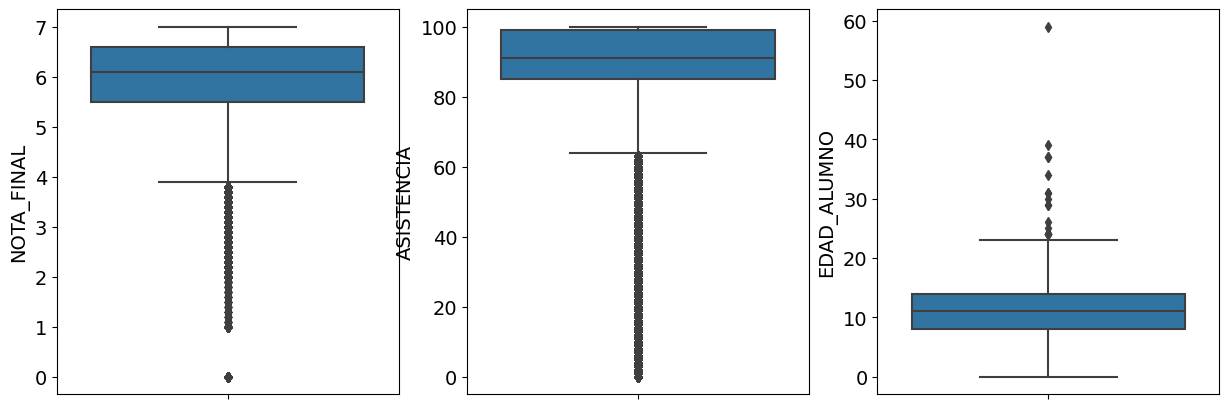

In [12]:
# subplot de graficos de caja con seaborn de NOTA_FINAL , ASISTENCIA y EDAD_ALUMNO
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(ax=axes[0],data=df,y='NOTA_FINAL')
sns.boxplot(ax=axes[1],data=df,y='ASISTENCIA')
sns.boxplot(ax=axes[2],data=df,y='EDAD_ALUMNO')

<Axes: xlabel='REGION', ylabel='EDAD_ALUMNO'>

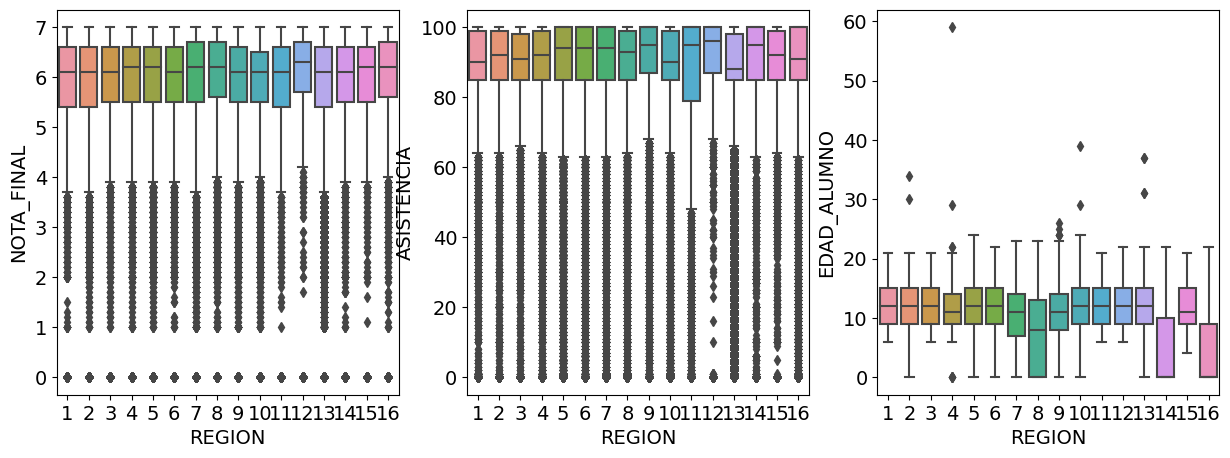

In [13]:
# subplot de graficos de caja con seaborn de NOTA_FINAL con respecto a la variable REGION
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(ax=axes[0],data=df,y='NOTA_FINAL',x='REGION')
sns.boxplot(ax=axes[1],data=df,y='ASISTENCIA',x='REGION')
sns.boxplot(ax=axes[2],data=df,y='EDAD_ALUMNO',x='REGION')

#### Histogramas con `seaborn`: https://seaborn.pydata.org/generated/seaborn.histplot.html


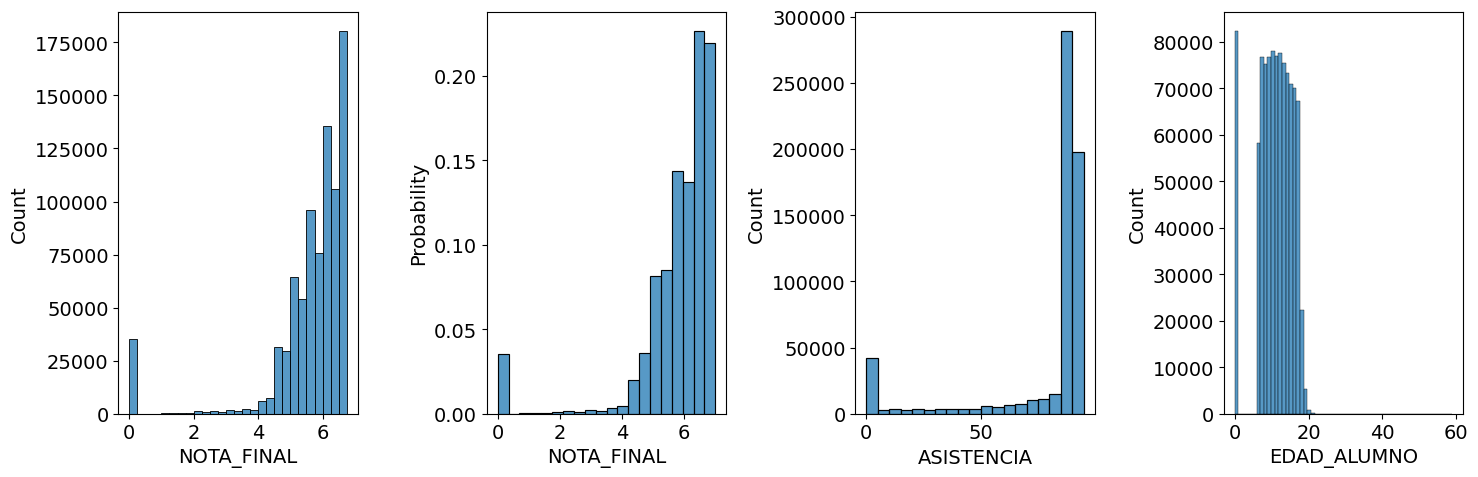

In [14]:
fig, axes = plt.subplots(1,4,figsize=(15,5))
sns.histplot(ax=axes[0],data=df,x='NOTA_FINAL',bins=np.arange(0,7,0.25)) # binning de 0.25 puntos, desde 0 a 7 
sns.histplot(ax=axes[1],data=df,x='NOTA_FINAL',bins=20,stat='probability') # binning de 20 puntos, desde 0 a 7, en términos de la función de probabilidad (eje y entre 0 y 1)
sns.histplot(ax=axes[2],data=df,x='ASISTENCIA',bins=np.arange(0,100,5)) # binning de 5 puntos, desde 0 a 100 
sns.histplot(ax=axes[3],data=df,x='EDAD_ALUMNO',bins=60) # binning de 1 punto, desde 0 a 25
plt.tight_layout()
plt.show()

**Notas:** Revise la documentación de `seaborn.histplot`y verifique cómo cambian sus gráficos al cambiar los argumentos:`bins`,`stat`,`kde`y otros que llamen su atención.

In [15]:
df[df['NOTA_FINAL']==0].count() # conteo de alumnos con nota final igual a 0

REGION             35120
RURAL              35120
NIVEL_EDUCACION    35120
EDAD_ALUMNO        35120
NOTA_FINAL         35120
ASISTENCIA         35120
SITUACION_FINAL    35120
dtype: int64

In [17]:
df[df['EDAD_ALUMNO']==0].count() # conteo de alumnos con edad igual a 0

REGION             82260
RURAL              82260
NIVEL_EDUCACION    82260
EDAD_ALUMNO        82260
NOTA_FINAL         82260
ASISTENCIA         82260
SITUACION_FINAL    82260
dtype: int64

In [18]:
df=df[(df['NOTA_FINAL']>0) & (df['ASISTENCIA']!=0)] # filtramos el dataframe para eliminar los alumnos con nota final igual a 0 y con asistencia igual a 0

In [19]:
df.shape

(952482, 7)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952482 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   REGION           952482 non-null  category
 1   RURAL            952482 non-null  category
 2   NIVEL_EDUCACION  952482 non-null  category
 3   EDAD_ALUMNO      952482 non-null  int64   
 4   NOTA_FINAL       952482 non-null  float64 
 5   ASISTENCIA       952482 non-null  int64   
 6   SITUACION_FINAL  952482 non-null  category
dtypes: category(4), float64(1), int64(2)
memory usage: 32.7 MB


### 4. ¿Cómo se distribuyen los datos por tipo de educación?

In [21]:
df['NIVEL_EDUCACION'].value_counts() # conteo de valores de la variable NIVEL_EDUCACION después de filtrar el dataframe original

BASICA      655778
MEDIA_CH    220044
MEDIA_TP     76660
Name: NIVEL_EDUCACION, dtype: int64

### 5. ¿Cómo se distribuyen los datos de acuerdo a la situación final de los estudiantes?


In [22]:
df['SITUACION_FINAL'].value_counts()

P    932886
R     19584
T         7
Y         5
          0
Name: SITUACION_FINAL, dtype: int64

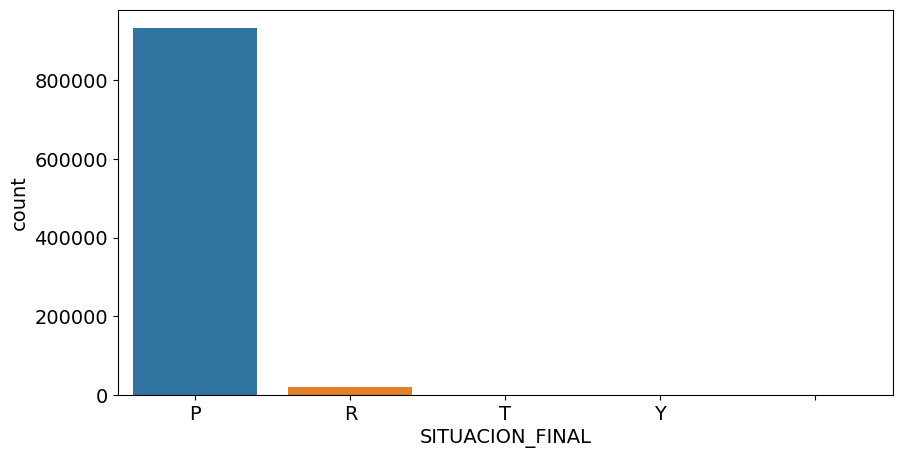

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=df,x='SITUACION_FINAL',order=df['SITUACION_FINAL'].value_counts().index,ax=ax) # ordenamos los valores de la variable SITUACION_FINAL de mayor a menor frecuencia
                                                                                                  # order=df['SITUACION_FINAL'].value_counts().index es el argumento que permite ordenar los valores de la variable SITUACION_FINAL
plt.show()

¿Cuáles son las posibles situaciones finales de un estudiante? ¿Coincide esto
con la información inicial?

In [31]:
df['SITUACION_FINAL'].value_counts()

P    932886
R     19584
T         7
Y         5
          0
Name: SITUACION_FINAL, dtype: int64

In [32]:
df[df['SITUACION_FINAL']==' ']

,REGION,RURAL,NIVEL_EDUCACION,EDAD_ALUMNO,NOTA_FINAL,ASISTENCIA,SITUACION_FINAL


¿Cómo imputamos los anteriores valores por 'P'? Hint: Funciones anónimas.

In [33]:
#seleccionar registros para los cuales la columna 'SITUACION_FINAL' tienen 'R' (reprobado) o 'P' (promovido)
df=df[df['SITUACION_FINAL'].isin(['P','R'])]
df.head(10)

,REGION,RURAL,NIVEL_EDUCACION,EDAD_ALUMNO,NOTA_FINAL,ASISTENCIA,SITUACION_FINAL
0,9,0,BASICA,8,7.0,100,P
1,13,0,MEDIA_CH,16,6.7,100,P
2,15,0,MEDIA_CH,17,6.5,90,P
3,9,1,BASICA,9,6.4,100,P
4,13,0,BASICA,13,5.6,79,P
5,13,0,MEDIA_TP,17,5.6,85,P
6,9,0,MEDIA_CH,15,5.9,90,P
7,8,0,BASICA,9,6.4,90,P
8,5,0,BASICA,7,6.5,96,P
9,13,0,MEDIA_CH,16,5.6,81,P


Mediante estos métodos de exploración, podemos concluir que existen registros de estudiantes con información incompleta, para muchos cuales no se tienen datos de asistencia y/o situación final. Para estos datos, es necesario realizar un análisis más fino para determinar si es posible imputar los datos faltantes, o si es más conveniente eliminar los registros incompletos.

Por ejemplo, existen registros con nota general 0.0 y asistencia 0%, los cuales son datos anómalos ya que la nota mínima es 1.0. Por lo tanto, estos datos deberían ser eliminados.

Por otra parte, existen registros con nota conocida, pero con porcentaje de asistencia situación final desconocidas. En estos casos podría asumirse la situación final (por ejemplo, se da por promovidos a estudiantes con nota general > 4.0), pero no es posible imputar un porcentaje de asistencia. Acá queda a criterio del analista si es posible determinar un método confiable para completar los datos faltantes, o si es preferible eliminar los registros incompletos.

En este caso, dado que uno de los objetivos es analizar el impacto de la asistencia a clases en el rendimiento escolar y la situación final de los estudiantes, y que los registros incompletos representan una fracción muy menor del conjunto completo, se optará por eliminarlos. En este caso, el análisis exploratorio de una variable categórica nos ha permitido identificar anomalías y completar la limpieza de datos.

## Análisis Exploratorio Multivariado

A continuación, agregamos algunos análisis multivariados.

### 1. ¿Cómo varía la asistencia por nivel educacional y zona?

¿Hay menor/mayor asistencia en educación básica que en media? ¿Hay menor/mayor asistencia en zonas rurales/urbanas?

In [34]:
#Una tabla pivote permite calcular estadísticas descriptivas, diferenciando por una o más categorías
pd.pivot_table(df,index='NIVEL_EDUCACION',values='ASISTENCIA',aggfunc='mean') 

# promedio de asistencia por nivel de educación
#index='NIVEL_EDUCACION' indica que la tabla pivote se calcula por nivel de educación
# values='ASISTENCIA' indica que la tabla pivote se calcula para la variable ASISTENCIA

,ASISTENCIA
NIVEL_EDUCACION,
BASICA,89.247779
MEDIA_CH,88.379536
MEDIA_TP,86.460827


En promedio, la asistencia es levemente menor en educación media que en básica.

In [35]:
pv=pd.pivot_table(df,index='NIVEL_EDUCACION',values='ASISTENCIA',columns='RURAL',aggfunc=['mean'])
pv
# promedio de asistencia por nivel de educación y tipo de establecimiento (rural o urbano)
#index='NIVEL_EDUCACION' indica que la tabla pivote se calcula por nivel de educación
# values='ASISTENCIA' indica que la tabla pivote se calcula para la variable ASISTENCIA
# columns='RURAL' indica que la tabla pivote se calcula para la variable RURAL


mean           
RURAL                    0          1
NIVEL_EDUCACION                      
BASICA           88.972502  91.706678
MEDIA_CH         88.383958  88.179352
MEDIA_TP         86.306124  88.829964

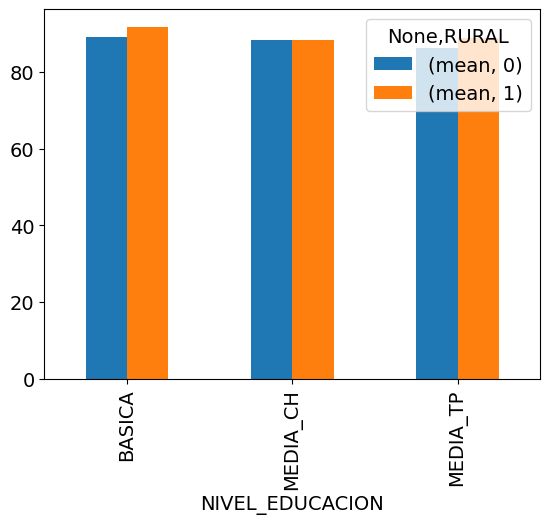

In [36]:
#Una tabla pivote se puede graficar diractemente usando el método plot()
pv.plot.bar()
plt.show()

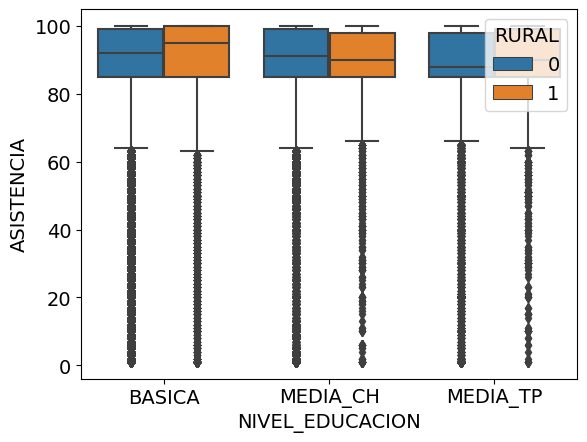

In [37]:
sns.boxplot(data=df,y='ASISTENCIA',x='NIVEL_EDUCACION',hue='RURAL')
plt.show()
# boxplot de asistencia por nivel de educación y tipo de establecimiento (rural o urbano)
# y='ASISTENCIA' indica que la variable ASISTENCIA se grafica en el eje y
# x='NIVEL_EDUCACION' indica que la variable NIVEL_EDUCACION se grafica en el eje x
# hue='RURAL' indica que la variable RURAL se grafica en el eje x y se diferencian los valores de la variable RURAL por color

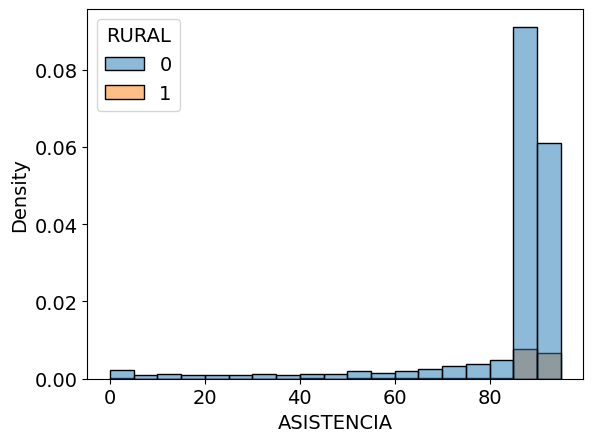

In [ ]:
sns.histplot(data=df,x='ASISTENCIA',hue='RURAL',bins=np.arange(0,100,5),stat='density')
plt.show()

# histograma de asistencia por tipo de establecimiento (rural o urbano)
# x='ASISTENCIA' indica que la variable ASISTENCIA se grafica en el eje x
# hue='RURAL' indica que la variable RURAL se grafica en el eje x y se diferencian los valores de la variable RURAL por color
# bins=np.arange(0,100,5) indica que se grafica el histograma con bins de 5 puntos, desde 0 a 100
# stat='density' indica que se grafica la función de densidad de probabilidad (eje y entre 0 y 1)

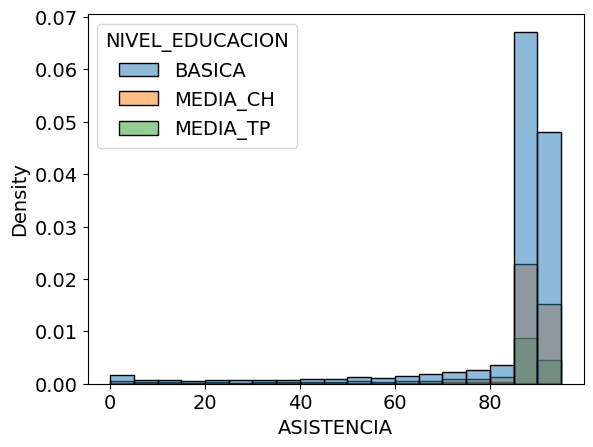

In [ ]:
sns.histplot(data=df,x='ASISTENCIA',hue='NIVEL_EDUCACION',bins=np.arange(0,100,5),stat='density')
plt.show()

# histograma de asistencia por nivel de educación
# x='ASISTENCIA' indica que la variable ASISTENCIA se grafica en el eje x
# hue='NIVEL_EDUCACION' indica que la variable NIVEL_EDUCACION se grafica en el eje x y se diferencian los valores de la variable NIVEL_EDUCACION por color
# bins=np.arange(0,100,5) indica que se grafica el histograma con bins de 5 puntos, desde 0 a 100
# stat='density' indica que se grafica la función de densidad de probabilidad (eje y entre 0 y 1)


No se aprecian diferencias significativas en la distribución de notas y asistencia de los escolares por nivel de educación, o entre zonas ruralres/urbanas.

### 3. ¿Cómo varía la asistencia y rendimiento académico por región?


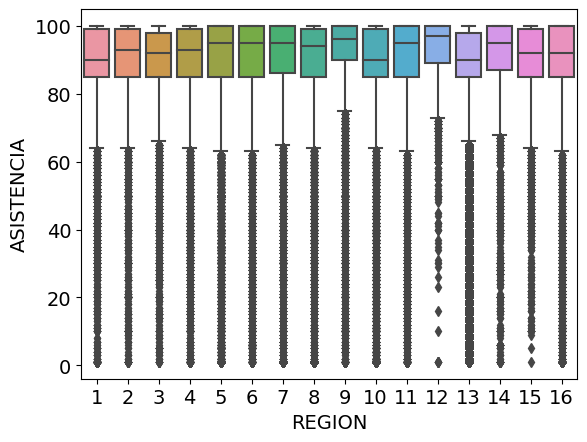

In [38]:
sns.boxplot(data=df,y='ASISTENCIA',x='REGION')
plt.show()


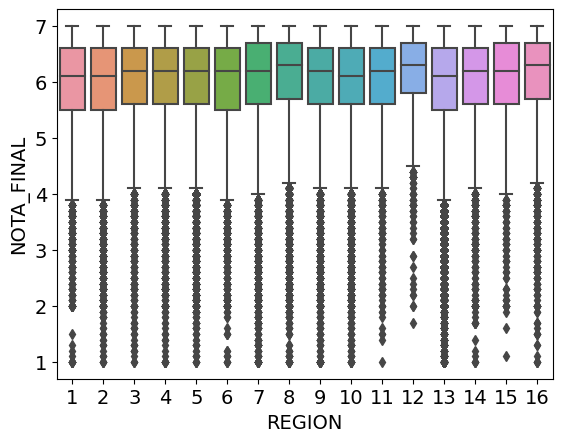

In [39]:
sns.boxplot(data=df,y='NOTA_FINAL',x='REGION')
plt.show()

### 4. ¿Hay correlación entre el rendimiento escolar y la asistencia?


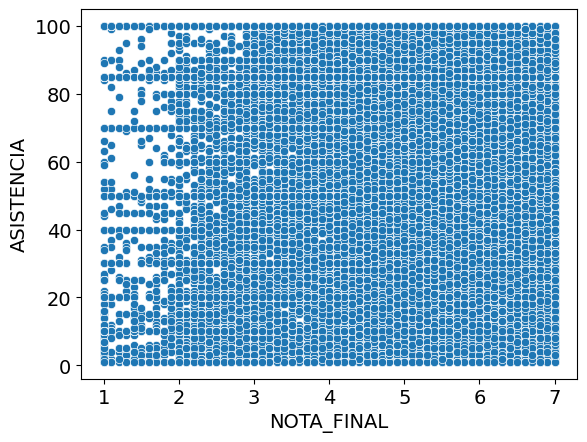

In [40]:
sns.scatterplot(data=df,x='NOTA_FINAL',y='ASISTENCIA') # gráfico de dispersión de nota final vs asistencia 
plt.show() 

# Presenta un grafico muy saturado de puntos, por lo que no se puede apreciar bien la relación entre las variables

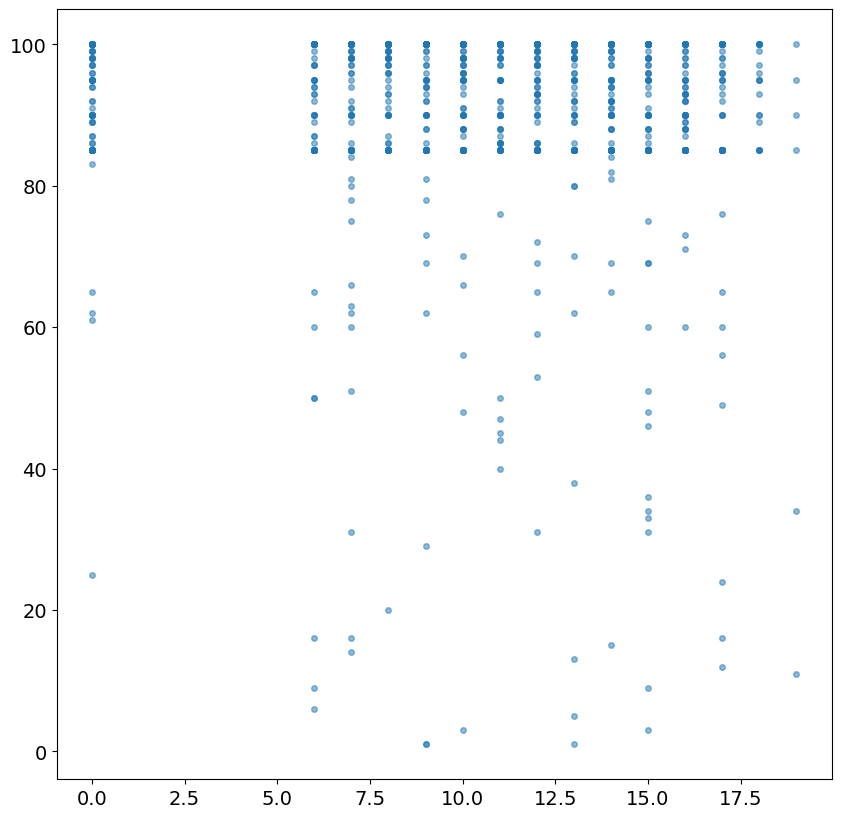

In [41]:
#El gráfico de dispersión está saturado, por lo tanto sampleamos algunos datos para mejor visualización
df2=df.sample(1000) # sampleamos 1000 registros del dataframe original para graficar el gráfico de dispersión

fig,ax=plt.subplots(figsize=(10,10))
ax.plot(df2['EDAD_ALUMNO'],df2['ASISTENCIA'],'o',alpha=0.5,markersize=4); # gráfico de dispersión de asistencia vs edad del alumno
plt.show()

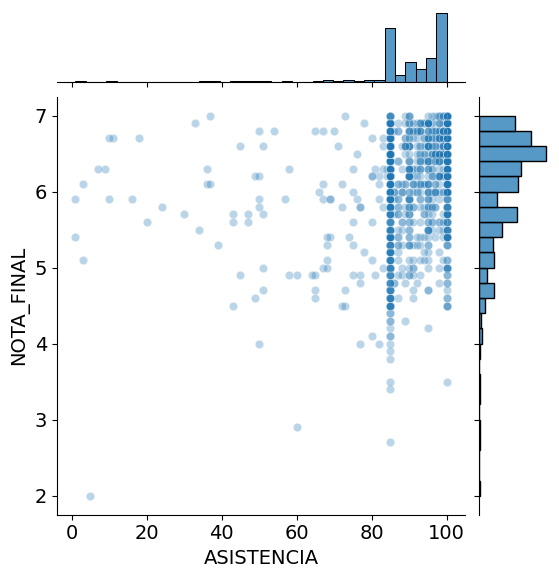

In [43]:
sns.jointplot(data=df2,x='ASISTENCIA',y='NOTA_FINAL',alpha=0.3,marker='o')
plt.show()
# gráfico de dispersión de nota final vs asistencia con histogramas de cada variable
# x='ASISTENCIA' indica que la variable ASISTENCIA se grafica en el eje x
# y='NOTA_FINAL' indica que la variable NOTA_FINAL se grafica en el eje y
# alpha=0.3 indica que la transparencia de los puntos es 0.3
# marker='o' indica que los puntos se grafican como círculos
